## Logistic Regression

In [675]:
install.packages("ISLR")

Installing package into 'C:/Users/shett/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [676]:
library("ISLR")

In [677]:
heart <- read.csv("Heart.csv")
head(heart,5)

X,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


In [678]:
summary(heart)

       X              Age             Sex                ChestPain  
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   asymptomatic:144  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   nonanginal  : 86  
 Median :152.0   Median :56.00   Median :1.0000   nontypical  : 50  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   typical     : 23  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000                     
 Max.   :303.0   Max.   :77.00   Max.   :1.0000                     
                                                                    
     RestBP           Chol            Fbs            RestECG      
 Min.   : 94.0   Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :130.0   Median :241.0   Median :0.0000   Median :1.0000  
 Mean   :131.7   Mean   :246.7   Mean   :0.1485   Mean   :0.9901  
 3rd Qu.:140.0   3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.000

In [679]:
hc <- heart
hc$ChestPain <- NULL
hc$Thal <- NULL

In [680]:
head(hc,6)

X,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
1,63,1,145,233,1,2,150,0,2.3,3,0,No
2,67,1,160,286,0,2,108,1,1.5,2,3,Yes
3,67,1,120,229,0,2,129,1,2.6,2,2,Yes
4,37,1,130,250,0,0,187,0,3.5,3,0,No
5,41,0,130,204,0,2,172,0,1.4,1,0,No
6,56,1,120,236,0,0,178,0,0.8,1,0,No


In [681]:
summary(hc)

       X              Age             Sex             RestBP     
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   Min.   : 94.0  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:120.0  
 Median :152.0   Median :56.00   Median :1.0000   Median :130.0  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   Mean   :131.7  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:140.0  
 Max.   :303.0   Max.   :77.00   Max.   :1.0000   Max.   :200.0  
                                                                 
      Chol            Fbs            RestECG           MaxHR      
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.7   Mean   :0.1485   Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
   

### 4a.

Data Set Information:
This is the Heart dataset from the ISLR package. This dataset has p = 11 features and k=2 where the 2 classes indicate the presence or absence of Angiographic Heart Disease (Yes,No).  
Attribute Information:
Only 12 attributes used: 
1. (Age) - age in years
2. (Sex) - sex (1 = male; 0 = female)
3. (RestBP) -  resting blood pressure (in mm Hg on admission to the hospital) 
4. (Chol) - serum cholestoral in mg/dl 
5. (Fbs) - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
6. (RestECG) - resting electrocardiographic results 
7. (MaxHR) - Maximum Heart Rate
8. (ExAng) - exercise induced angina (1 = yes; 0 = no) 
9. (Oldpeak) - ST depression induced by exercise relative to rest 
10. (Slope) - the slope of the peak exercise ST segment 
11. (Ca) - number of major vessels (0-3) colored by flourosopy 
12. (AHD) (the predicted attribute) - Angiographic Heart Disease Status

Sample Size in each class for AHD
1. k = 1 = No = 164 observations
2. k = 2 = Yes = 139 observations

All variables are quantitative

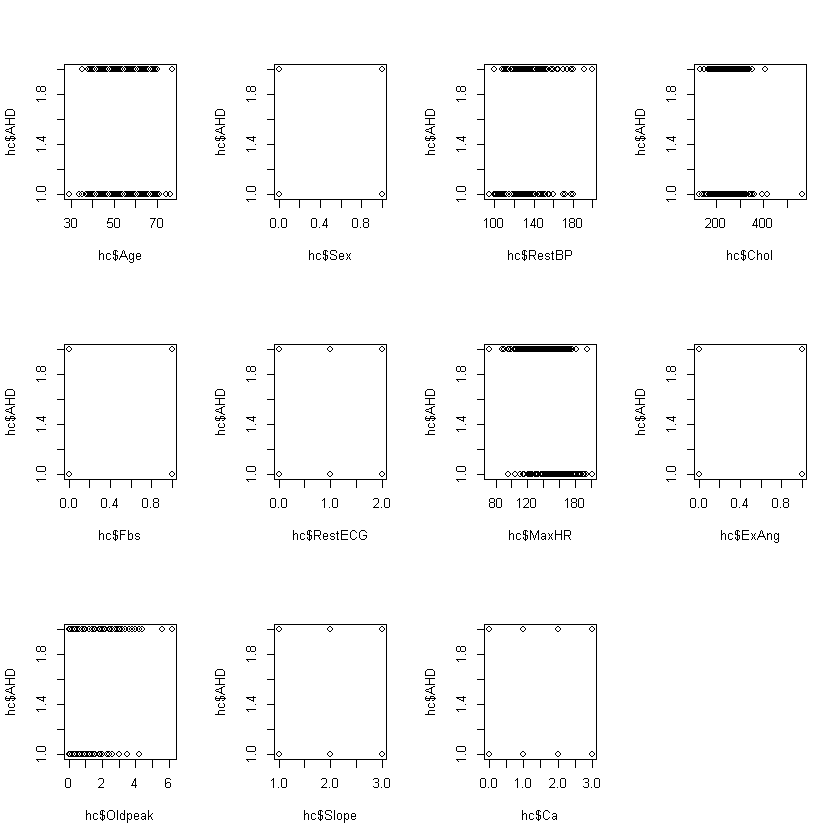

In [682]:
par(mfrow=c(3,4))
plot(x=hc$Age,y=hc$AHD)
plot(x=hc$Sex,y=hc$AHD)
plot(x=hc$RestBP,y=hc$AHD)
plot(x=hc$Chol,y=hc$AHD)
plot(x=hc$Fbs,y=hc$AHD)
plot(x=hc$RestECG,y=hc$AHD)
plot(x=hc$MaxHR,y=hc$AHD)
plot(x=hc$ExAng,y=hc$AHD)
plot(x=hc$Oldpeak,y=hc$AHD)
plot(x=hc$Slope,y=hc$AHD)
plot(x=hc$Ca,y=hc$AHD)

The variables Slope, Ca, ExAng, RestECG, Fbs and Sex are variables with fixed values. Hence it is difficult to predict the outcome of Y(AHD) based on the scatterplots for these variables.

In the case of Age, Chol and OldPeak the spread of data across the X axis is more or less the same for both Y = 1 or Y = 2 and hence there seems to be no discernible trend in the scatter plots that would help predict Y(AHD)

RestBP - Based on the scatterplot alone there is a slight positive correlation between RestBP and Y(AHD)

MaxHR - Based on the scatterplot alone there is a slight negative correlation between MaxHR and Y(AHD)



In [683]:
logfit <- glm(AHD ~ Age+Sex+RestBP+Chol+Fbs+RestECG+MaxHR+ExAng+Oldpeak+Slope+Ca,data=hc,family=binomial())
summary(logfit)


Call:
glm(formula = AHD ~ Age + Sex + RestBP + Chol + Fbs + RestECG + 
    MaxHR + ExAng + Oldpeak + Slope + Ca, family = binomial(), 
    data = hc)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6250  -0.5598  -0.2238   0.5311   2.5436  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.536218   2.460752  -1.437  0.15070    
Age         -0.016989   0.022313  -0.761  0.44643    
Sex          1.790264   0.415343   4.310 1.63e-05 ***
RestBP       0.021924   0.010099   2.171  0.02994 *  
Chol         0.006570   0.003629   1.810  0.07027 .  
Fbs         -0.980675   0.490803  -1.998  0.04571 *  
RestECG      0.131016   0.170218   0.770  0.44148    
MaxHR       -0.027097   0.009374  -2.891  0.00384 ** 
ExAng        1.512324   0.369133   4.097 4.19e-05 ***
Oldpeak      0.242883   0.193560   1.255  0.20954    
Slope        0.677031   0.337920   2.004  0.04512 *  
Ca           1.336411   0.245082   5.453 4.95e-08 ***
---
Signif. codes:

According to the model in c we can reject the variables Age, Chol, RestECG, Oldpeak because the p values are greater than significance level 0.05. While the impact of RestECG was difficult to determine from the scatterplots alone, we were able to see that Age, Chol and Oldpeak had no impact on AHD based on the scatterplots alone.

According to the model in c X1 = Age. It has a coefficient of -0.016989. Therefore a one unit increase in Age leads to a roughly 0.017 unit decrease in the log odds for AHD.